2.12.0
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        476       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 56)        14168     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 56)        28280     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                            

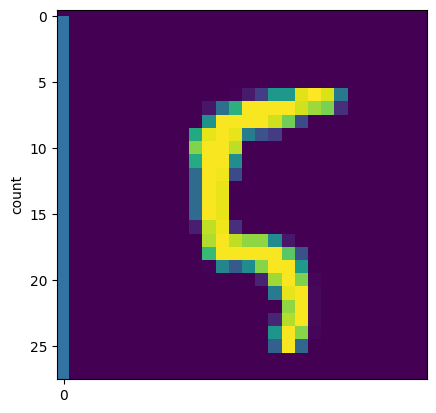

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
sns.countplot(y_train)
np.isnan(x_train).any()
np.isnan(x_test).any()

input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

plt.imshow(x_train[100][:,:,0])
print(y_train[100])

batch_size = 64
num_classes = 10
epochs = 10

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)
datagen.fit(x_train)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, (4, 4), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(56, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(56, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(112, activation='relu'),
    tf.keras.layers.Dropout(0.4),    
    tf.keras.layers.Dense(10,  activation='softmax')
])

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
model.summary()




In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[checkpoint])

model.save('mnist_cnn_model.h5')
print("Model saved successfully!")

Epoch 1/10
844/844 [==============================] - 25s 29ms/step - loss: 0.2309 - accuracy: 0.9276 - val_loss: 0.0450 - val_accuracy: 0.9860
Epoch 2/10
844/844 [==============================] - 24s 29ms/step - loss: 0.0716 - accuracy: 0.9786 - val_loss: 0.0500 - val_accuracy: 0.9840
Epoch 3/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 4/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0311 - val_accuracy: 0.9920
Epoch 5/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0327 - accuracy: 0.9905 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 6/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0291 - val_accuracy: 0.9923
Epoch 7/10
844/844 [==============================] - 25s 30ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0310 - val_accuracy:

ĐÁNH GIÁ MODEL

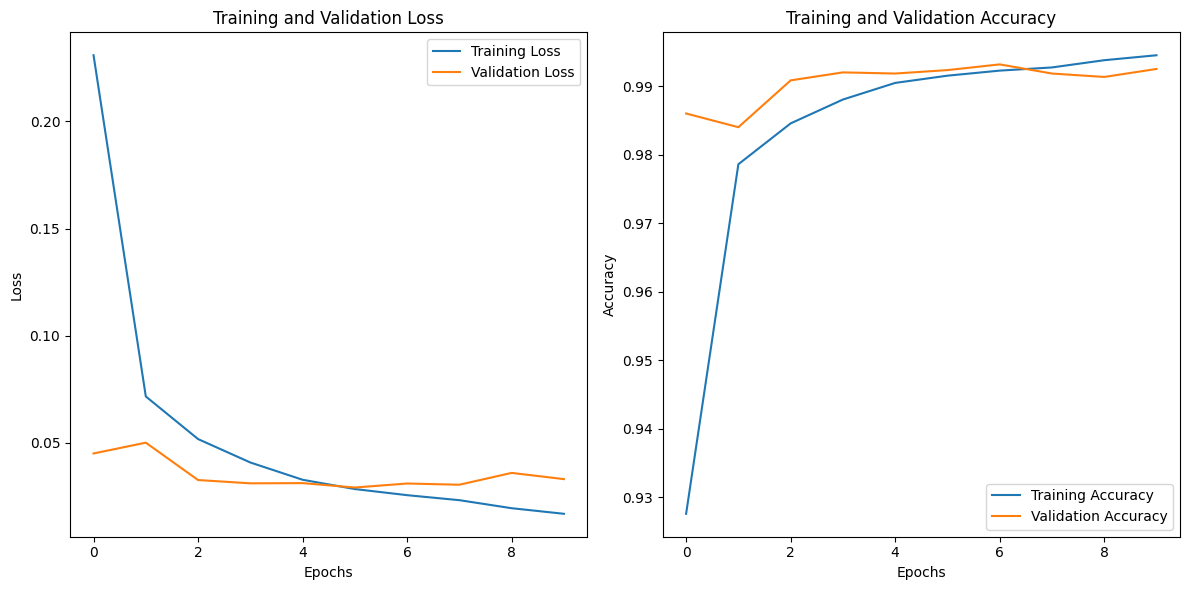

In [7]:
# Lấy thông tin huấn luyện từ biến history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tạo biểu đồ về loss và accuracy trong cùng một hình
plt.figure(figsize=(12, 6))

# Biểu đồ về loss
plt.subplot(1, 2, 1)  # Tạo lưới 1 hàng và 2 cột, vẽ biểu đồ đầu tiên
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Biểu đồ về accuracy
plt.subplot(1, 2, 2)  # Tạo lưới 1 hàng và 2 cột, vẽ biểu đồ thứ hai
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()  # Đảm bảo không bị chồng chéo dữ liệu
plt.show()

HEAT MAP

313/313 [==============================] - 1s 4ms/step


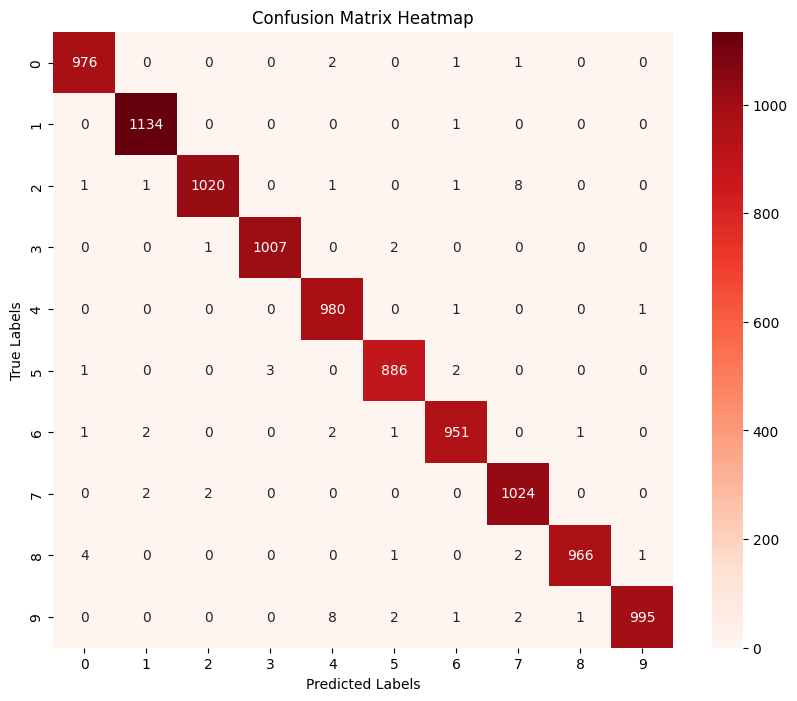

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu tập test (x_test, y_test) từ nguồn dữ liệu của bạn
# ...

# Load mô hình đã huấn luyện từ file
model = tf.keras.models.load_model('mnist_cnn_model.h5')

# Dự đoán nhãn cho tập test
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Chuyển từ one-hot encoding sang nhãn dự đoán

# Chuyển từ one-hot encoding sang nhãn thực tế của tập test
y_test_labels = np.argmax(y_test, axis=1)

# Tạo confusion matrix
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)

# Vẽ heat map
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model("./best_model.h5")
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.format(test_acc, test_loss))

Test accuracy is: 0.9931 
Test loss is: 0.0227


SỬ DỰNG MODEL

In [18]:
import cv2
import tensorflow as tf

def convert_to_binary_otsu(image):
    # Xác định ngưỡng tự động bằng phương pháp Otsu
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

# Đường dẫn tới ảnh đầu vào
image_path = './DataTest/numberDetectedCropped_Origin_2.png'

# Đọc ảnh từ file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
binary_image = convert_to_binary_otsu(image)
binary_image = cv2.bitwise_not(binary_image)
# Resize ảnh về kích thước 28x28 như MNIST dataset
image_resized = cv2.resize(binary_image, (28, 28))

# Đảm bảo ảnh có giá trị từ 0 đến 255
image_rescaled = image_resized / 255.0
cv2.imwrite("Test.png", binary_image)

# Chuyển ảnh về định dạng (28, 28, 1) để phù hợp với đầu vào của mô hình CNN
input_image = image_rescaled.reshape(1, 28, 28, 1)
# Sử dụng mô hình để dự đoán
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')
predictions = loaded_model.predict(input_image)

# In ra số được dự đoán và xác suất tương ứng cho mỗi số
for i in range(10):
    print("Probability of being", i, ":", predictions[0][i])

1/1 [==============================] - 0s 58ms/step
Probability of being 0 : 8.000146e-13
Probability of being 1 : 4.270546e-06
Probability of being 2 : 3.5112325e-07
Probability of being 3 : 4.6801452e-07
Probability of being 4 : 6.366772e-10
Probability of being 5 : 1.2622497e-11
Probability of being 6 : 1.4116136e-14
Probability of being 7 : 0.9999949
Probability of being 8 : 3.27564e-10
Probability of being 9 : 1.3310558e-09


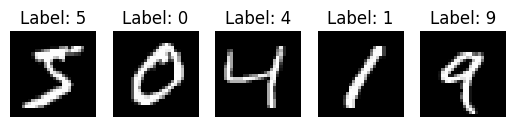

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the class labels (0 to 9 digits)
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Show a few images along with their labels
num_images_to_show = 5

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: " + class_labels[y_train[i]])
    plt.axis('off')

plt.show()

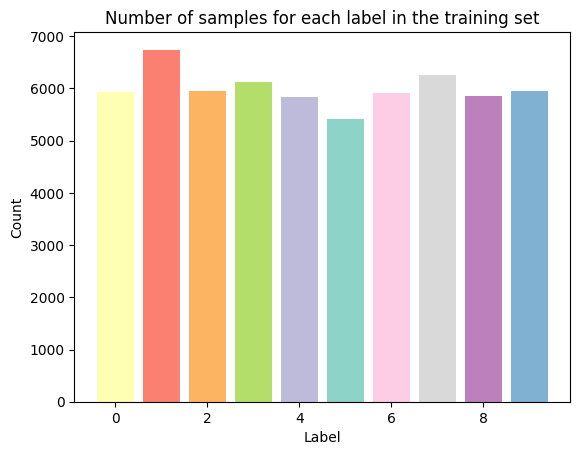

In [67]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Calculate the count of each label in the training set
label_counts = {}
for label in y_train:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Convert the label_counts dictionary to lists for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Define a color map for the bar chart
color_map = plt.get_cmap('Set3')

# Create a bar chart to visualize the count of each label
plt.bar(labels, counts, color=color_map(range(len(labels))))

# Set labels for x and y axes
plt.xlabel("Label")
plt.ylabel("Count")

# Set title for the plot
plt.title("Number of samples for each label in the training set")

# Show the plot
plt.show()

In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())